# Extraction de données 

Extraction de données pour le cours IA & SHS (data challenge). Notebook qui utilise un tableau extrait en février 2021. 

Les données viennent de **The Texas Tribune**, et recouvrent en tout 111 agences.

Quelques informations:
- Base créée en Novembre 2008
- Salaire médian est de $44,642 (trouvé sur leur site, et confirmé avec les données)
- D'après une [note](https://www.texastribune.org/2020/05/20/texas-tribune-salaries-database/) de Mai 2020, les salaires des personnes universitaires et hospitalières ne sont plus publiées
- Les descriptions de postes se font selon la nomenclature https://hr.sao.texas.gov/CompensationSystem/JobDescriptions

In [251]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median

import random
random.seed(123)

In [252]:
texas = pd.read_csv('./texas-2021-02-01.csv') 

In [253]:
texas.shape

(146808, 21)

In [254]:
list(texas.columns)

['AGY',
 'NAME',
 'LASTNAME',
 'FIRSTNAME',
 'MI',
 'JOBCLASS',
 'JC TITLE',
 'RACE',
 'SEX',
 'EMPTYPE',
 'HIREDT',
 'RATE',
 'HRSWKD',
 'MONTHLY',
 'ANNUAL',
 'STATENUM',
 'duplicated',
 'multiple_full_time_jobs',
 'combined_multiple_jobs',
 'summed_annual_salary',
 'hide_from_search']

In [255]:
# 111 agencies
len(texas.AGY.unique())

111

In [256]:
# see that the AGY is redundant with the agency name
len(texas.NAME.unique())

111

In [257]:
# delete redundant column with Y
del texas["MONTHLY"]
del texas["summed_annual_salary"]

# useless column
del texas['hide_from_search']

# delete duplicated rows
texas = texas.drop_duplicates()
texas.shape

(146808, 18)

In [258]:
# there is a duplicated column
subset = texas.loc[texas['duplicated'] == True]
subset.FIRSTNAME

0     STACEY                        
1     STACEY                        
2     DAVID                         
3     DAVID                         
4     MARIE                         
                   ...              
65    CRAIG                         
66    JENNA                         
67    JENNA                         
68    ANGELA                        
69    HECTOR                        
Name: FIRSTNAME, Length: 70, dtype: object

According to what I understand from the website, these are columns that are redundant because people have several jobs within the administration. Because it may complicate the task and because it does not represent a lot of people, we remove them.

In [259]:
# selecting rows without the duplicated conditions 
texas = texas.loc[texas['duplicated'] != True]
texas.shape

(146738, 18)

In [260]:
# remove names
del texas["LASTNAME"]
del texas["FIRSTNAME"]

In [261]:
# finally AGY is not kept because it is redundant with NAME
numerical_columns = ['RATE', 'HRSWKD', 'STATENUM', 'multiple_full_time_jobs']
categorical_columns = ['NAME', 'MI', 'JOBCLASS', 'JC TITLE', 'RACE', 'SEX', 'EMPTYPE', 'HIREDT', 'combined_multiple_jobs']

data_columns = numerical_columns + categorical_columns

X = texas[data_columns]
y = texas.ANNUAL

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.15)
train = pd.concat([X_train, y_train], axis=1)

In [263]:
train.to_csv("./train_data.csv")
X_test.to_csv("./test_data.csv")
y_test.to_csv("./y_test.csv")
assert X.shape[0] == train.shape[0] + X_test.shape[0]

Quelques compléments sur les données

(array([ 1930., 49477., 59185., 20929.,  8125.,  3492.]),
 array([ 10000,  20000,  40000,  60000,  80000, 100000, 120000]),
 <BarContainer object of 6 artists>)

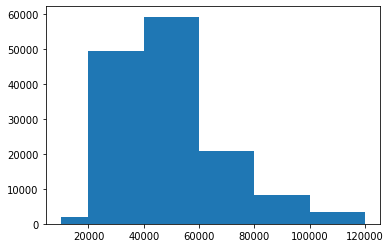

In [264]:
plt.hist(texas.ANNUAL, bins = [10000, 20000, 40000, 60000, 80000, 100000, 120000])

In [265]:
median(texas.ANNUAL)

44642.04

['RATE',
 'HRSWKD',
 'STATENUM',
 'multiple_full_time_jobs',
 'NAME',
 'MI',
 'JOBCLASS',
 'JC TITLE',
 'RACE',
 'SEX',
 'EMPTYPE',
 'HIREDT',
 'combined_multiple_jobs']

['RATE',
 'HRSWKD',
 'STATENUM',
 'multiple_full_time_jobs',
 'NAME',
 'MI',
 'JOBCLASS',
 'JC TITLE',
 'RACE',
 'SEX',
 'EMPTYPE',
 'HIREDT',
 'combined_multiple_jobs',
 'ANNUAL']